In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/ml-algorithms-project/nightvisitors.csv")

In [12]:
X = df.drop(columns=["yearmon"])

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [15]:
df["Cluster"] = clusters

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

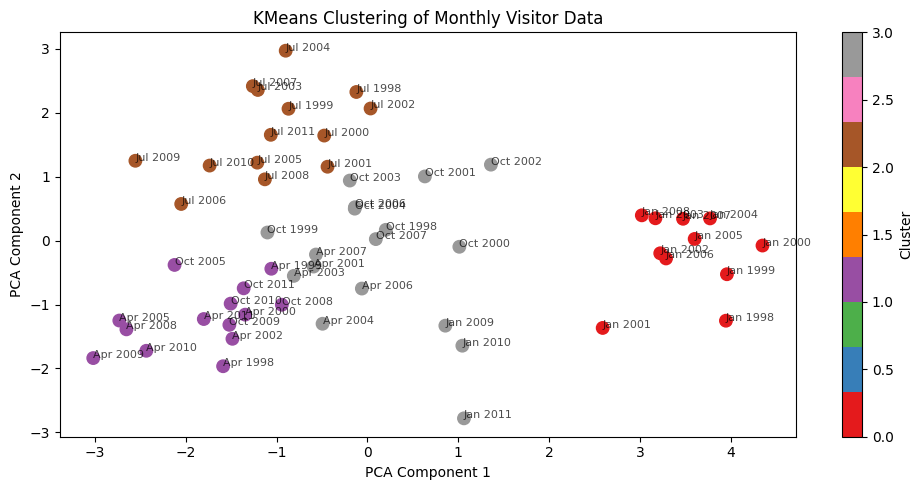

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="Set1", s=80)
for i, label in enumerate(df["yearmon"]):
    plt.annotate(label, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)
plt.title("KMeans Clustering of Monthly Visitor Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()
